In [2]:
import pybullet as p
import numpy as np
from matplotlib import pyplot as plt

In [3]:
sim_id = p.connect(p.DIRECT)

In [4]:
import pybullet_data
p.setAdditionalSearchPath(pybullet_data.getDataPath())

In [5]:
p.resetSimulation()

plane_id=p.loadURDF('plane.urdf',
            physicsClientId=sim_id)
robot_id=p.loadURDF("kuka_iiwa/model.urdf",
            basePosition=[0,0,0],
            baseOrientation=p.getQuaternionFromEuler([0,0,0]),
            useFixedBase=True,
            physicsClientId=sim_id,
            globalScaling=1,
            flags=p.URDF_USE_IMPLICIT_CYLINDER)
cube_id=p.loadURDF('cube.urdf',
            basePosition=[0.5, 0, 0.5],
            physicsClientId=sim_id,
            globalScaling=0.2)
sphere_id=p.loadURDF('sphere2.urdf',
            basePosition=[0, 0.5, 0.5],
            physicsClientId=sim_id,
            globalScaling=0.2)

p.getNumBodies()

4

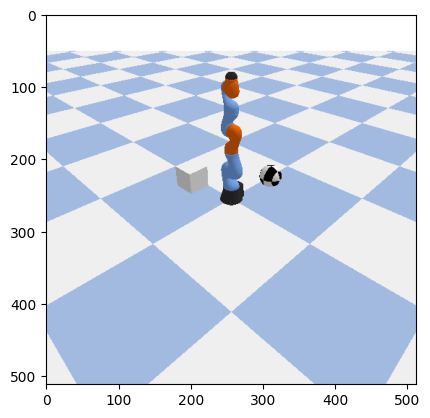

In [6]:
def showImage(cameraPos=[2, 2, 2]):
  viewMatrix = p.computeViewMatrix(
              cameraEyePosition=cameraPos,
              cameraTargetPosition=[0, 0, 0],
              cameraUpVector=[0, 0, 1])
  projectionMatrix = p.computeProjectionMatrixFOV(
              fov=60.0,
              aspect=1.0,
              nearVal=0.1,
              farVal=10)
  width, height, rgbImg, depthImg, segImg = p.getCameraImage(
              width=512,
              height=512,
              viewMatrix=viewMatrix,
              projectionMatrix=projectionMatrix)
  plt.imshow(rgbImg)

showImage()

In [7]:
def is_collision():
  p.performCollisionDetection(sim_id)
  pts1 = p.getContactPoints(robot_id,cube_id)
  pts2 = p.getContactPoints(robot_id,sphere_id)
  if pts1 or pts2:
    return True
  return False

def move_end_effector(target_pos):
  poses = p.calculateInverseKinematics(robot_id,6,target_pos)
  for i in range(len(poses)):
    p.resetJointState(robot_id, i, poses[i])
  pass

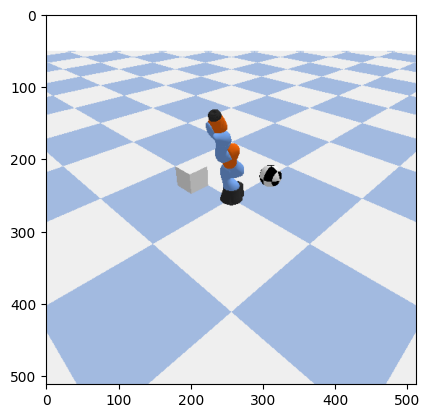

In [8]:
move_end_effector([2,2,2])
showImage()

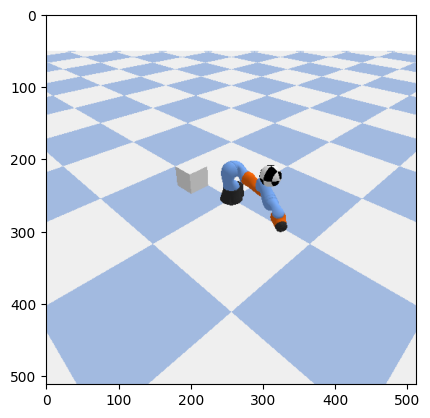

In [9]:
move_end_effector([-5,10,2])
showImage()

In [10]:
import time

In [11]:
physicsClient = p.connect(p.GUI)#or p.DIRECT for non-graphical version
p.setAdditionalSearchPath(pybullet_data.getDataPath()) #optionally
p.setGravity(0,0,-10)
planeId = p.loadURDF("plane.urdf")
startPos = [0,0,1]
startOrientation = p.getQuaternionFromEuler([0,0,0])
boxId = p.loadURDF("r2d2.urdf",startPos, startOrientation)
#set the center of mass frame (loadURDF sets base link frame) startPos/Ornp.resetBasePositionAndOrientation(boxId, startPos, startOrientation)
for i in range (10000):
    p.stepSimulation()
    time.sleep(1./240.)
cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId)
print(cubePos,cubeOrn)
p.disconnect()


Version = 4.1 INTEL-22.5.11
Vendor = Intel Inc.
Renderer = Intel(R) Iris(TM) Plus Graphics OpenGL Engine
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started


2025-03-25 16:08:07.725 Python[68750:4688530] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
